In [30]:
import requests
import json
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [141]:
BALSHT = requests.get('https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=AAPL&apikey=BNM3OK9KHBBVD3YZ') #api request for balance sheet for AAPL
INCSTAT = requests.get('https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=AAPL&apikey=BNM3OK9KHBBVD3YZ') #api request for income statement for AAPL


In [153]:
bsdata = BALSHT.text
bsparsed = json.loads(bsdata)
bsquartdata = bsparsed['quarterlyReports']
bsquartdf = pd.DataFrame.from_dict(bsquartdata)

isdata = INCSTAT.text
isparsed = json.loads(isdata)
isquartdata = isparsed['quarterlyReports']
isquartdf = pd.DataFrame.from_dict(isquartdata)

In [143]:
bsolddf = pd.read_excel("AAPL BAL SHEET.xls")

isolddf = pd.read_excel("AAPL INCOME SHEET.xls")

In [155]:
assets_liab_new = bsquartdf[['fiscalDateEnding', 'totalAssets', 'totalLiabilities']]
assets_liab_new['fiscalDateEnding'] = pd.to_datetime(assets_liab_new['fiscalDateEnding'])
assets_liab_new[['totalAssets', 'totalLiabilities']] = assets_liab_new[['totalAssets', 'totalLiabilities']].apply(pd.to_numeric)
assets_liab_old = bsolddf[['Period End Date', 'TOTAL ASSETS', 'TOTAL LIABILITIES']]
new_cols = {x: y for x, y in zip(assets_liab_old.columns, assets_liab_new.columns)}
assets_liab = assets_liab_new.append(assets_liab_old.rename(columns=new_cols))
assets_liab

<ipython-input-155-e7f28c0da284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets_liab_new['fiscalDateEnding'] = pd.to_datetime(assets_liab_new['fiscalDateEnding'])
C:\Users\jovin\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,fiscalDateEnding,totalAssets,totalLiabilities
0,2020-12-31,354054000000,287830000000
1,2020-09-30,323888000000,258549000000
2,2020-06-30,317344000000,245062000000
3,2020-03-31,320400000000,241975000000
4,2019-12-31,340618000000,251087000000
5,2019-09-30,338516000000,248028000000
6,2019-06-30,322239000000,3123000000
7,2019-03-31,341998000000,3487000000
8,2018-12-31,373719000000,3819000000
9,2018-09-30,365725000000,13386000000


<AxesSubplot:xlabel='fiscalDateEnding', ylabel='totalAssets'>

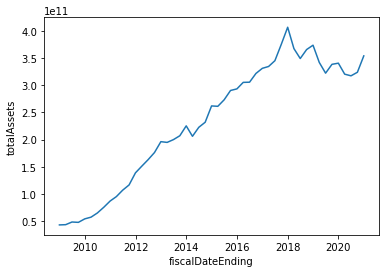

In [146]:
sb.lineplot(data=assets_liab, x="fiscalDateEnding", y="totalAssets")

<AxesSubplot:xlabel='fiscalDateEnding', ylabel='totalLiabilities'>

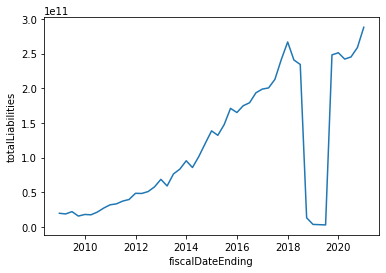

In [147]:
sb.lineplot(data=assets_liab, x="fiscalDateEnding", y="totalLiabilities")

In [148]:
profits_new = isquartdf[['fiscalDateEnding', 'grossProfit']]
profits_new['fiscalDateEnding'] = pd.to_datetime(profits_new['fiscalDateEnding'])
profits_new['grossProfit'] = pd.to_numeric(profits_new['grossProfit'])
profits_old = isolddf[['Period End Date', 'Gross Profit']]
new_cols = {x: y for x, y in zip(profits_old.columns, profits_new.columns)}
profits = profits_new.append(profits_old.rename(columns=new_cols))



<ipython-input-148-1fc7ceccf000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_new['fiscalDateEnding'] = pd.to_datetime(profits_new['fiscalDateEnding'])
<ipython-input-148-1fc7ceccf000>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_new['grossProfit'] = pd.to_numeric(profits_new['grossProfit'])


<AxesSubplot:xlabel='fiscalDateEnding', ylabel='grossProfit'>

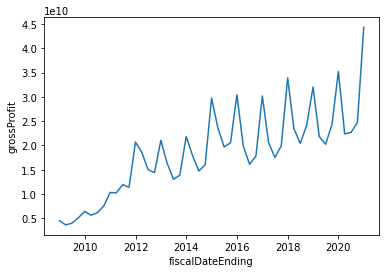

In [149]:
sb.lineplot(data=profits, x="fiscalDateEnding", y="grossProfit")